In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
#from wordcloud import WordCloud, STOPWORDS
#from google.cloud import language_v1
#from PIL import Image
import io
import os

# 1. Data Cleaning

In [4]:
# read data
data_test = pd.read_csv('religious_text_test.csv')
data_train = pd.read_csv('religious_text_train.csv')

In [5]:
# fill missing values
data_train[:] = data_train.fillna(0)
data_test[:] = data_test.fillna(0)

# rename the unnamed column to Chapters, '# foolishness' to just foolishness
data_train.rename(columns = {'Unnamed: 0' : 'Chapters'}, inplace = True)
data_test.rename(columns = {'# foolishness' : 'foolishness'}, inplace = True)

# make sure everything is an integer
data_test = data_test.applymap(int).astype(int)
data_train.iloc[:, 1:] = data_train.iloc[:, 1:].applymap(int).astype(int)

In [6]:
# Data validation stuff, more cleaning

all(data_train.iloc[:,1:].dtypes == 'int64') # True (All entries are integers)
all(data_test.dtypes == 'int64') # True (All entries are integers)

all(list(map(lambda a: ' ' not in a, data_train.iloc[:,1:].columns))) # Each column is one word
all(list(map(lambda a: ' ' not in a, data_test.columns))) # Each column is one word

True

In [7]:
# Extraaaaaa way of getting the books lmao, dont do this
books = [i[0] for i in list(map(lambda a: a.split('_'), data_train['Chapters'].unique())) if i[1] == 'Ch1']

# dataframes segregated by chapters
book_list = [data_train[[j in i for i in data_train['Chapters']]] for j in books]

# top 20 words for each book in a list containing 8 series
top_20_books = [j.sort_values(ascending = False) for j in [i.iloc[:,1:].sum() for i in book_list]]

# total words in each book
total_words_book = dict(zip(books, [i.sum() for i in top_20_books]))

# total words in each chapter of each book (dictionary)
total_words_chapter = dict(zip(books,[pd.Series(data=i.iloc[:,1:].sum(axis=1).tolist(), index=i.iloc[:,0]) for i in book_list]))

# Series for each book (Top 20 Words)
buddhism_20 = top_20_books[0]; tao_20 = top_20_books[1]
upanishad_20 = top_20_books[2]; yoga_20 = top_20_books[3]
proverb_20 = top_20_books[4]; ecclesiastes_20 = top_20_books[5]
eccleasiasticus_20 = top_20_books[6]; wisdom_20 = top_20_books[7]

# Top 20 words for all books
all_20 = data_train.iloc[:,1:].sum().sort_values(ascending = False)
# total words in the dataframe 
total_words = all_20.sum()

In [ ]:
# Word cloud visualizations (ready for graphing)

# for all books in total
desc = all_20[:20].index.tolist(); counts = all_20[:20].tolist()
wordcloud_20 = WordCloud(max_words = 20).generate_from_frequencies(dict(zip(desc,counts))) # stored here

# for each book (in a list)
word_cloud_each = [] # all in this list
for i in top_20_books:
    desc = i[:20].index.tolist(); counts = i[:20].tolist()
    word_cloud_each.append(WordCloud(max_words = 20).generate_from_frequencies(dict(zip(desc,counts))))



In [ ]:


# Instantiates a client
client = language_v1.LanguageServiceClient()

# The text to analyze
text = "Hello, world!"
document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)

# Detects the sentiment of the text
sentiment = client.analyze_sentiment(request={'document': document}).document_sentiment

print("Text: {}".format(text))
print("Sentiment: {}, {}".format(sentiment.score, sentiment.magnitude))

In [ ]:
import io
import os

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="lustrous-center-305403-e1dd08c2ab3c.json"



def sample_analyze_sentiment(text_content):
    """
    Analyzing Sentiment in a String

    Args:
      text_content The text content to analyze
    """

    client = language_v1.LanguageServiceClient()

   

    # Available types: PLAIN_TEXT, HTML
    type_ = language_v1.Document.Type.PLAIN_TEXT

    # Optional. If not specified, the language is automatically detected.
    # For list of supported languages:
    # https://cloud.google.com/natural-language/docs/languages
    language = "en"
    document = {"content": text_content, "type_": type_, "language": language}

    # Available values: NONE, UTF8, UTF16, UTF32
    encoding_type = language_v1.EncodingType.UTF8

    response = client.analyze_sentiment(request = {'document': document, 'encoding_type': encoding_type})
    # Get overall sentiment of the input document
    print(u"Document sentiment score: {}".format(response.document_sentiment.score))
    print(
        u"Document sentiment magnitude: {}".format(
            response.document_sentiment.magnitude
        )
    )
    # Get sentiment for all sentences in the document
    for sentence in response.sentences:
        print(u"Sentence text: {}".format(sentence.text.content))
        print(u"Sentence sentiment score: {}".format(sentence.sentiment.score))
        print(u"Sentence sentiment magnitude: {}".format(sentence.sentiment.magnitude))

    # Get the language of the text, which will be the same as
    # the language specified in the request or, if not specified,
    # the automatically-detected language.
    print(u"Language of the text: {}".format(response.language))
    
text = 'I love my wife I love my life'
sample_analyze_sentiment(text)

In [ ]:
data_train.describe()
                

# 2. Visualizations

In [7]:
total_words_book

{'Buddhism': 6624,
 'TaoTeChing': 4608,
 'Upanishad': 6579,
 'YogaSutra': 12443,
 'BookOfProverb': 7716,
 'BookOfEcclesiastes': 2773,
 'BookOfEccleasiasticus': 14839,
 'BookOfWisdom': 5027}

In [8]:
total_words_chapter

{'Buddhism': Chapters
 Buddhism_Ch1      298
 Buddhism_Ch2      107
 Buddhism_Ch3      188
 Buddhism_Ch4      129
 Buddhism_Ch5       15
 Buddhism_Ch6      244
 Buddhism_Ch7      226
 Buddhism_Ch8       89
 Buddhism_Ch9      110
 Buddhism_Ch10      30
 Buddhism_Ch11     339
 Buddhism_Ch12      59
 Buddhism_Ch13      16
 Buddhism_Ch14       0
 Buddhism_Ch15      45
 Buddhism_Ch16      56
 Buddhism_Ch17      31
 Buddhism_Ch18     144
 Buddhism_Ch19      17
 Buddhism_Ch20       8
 Buddhism_Ch21     166
 Buddhism_Ch22      80
 Buddhism_Ch23     108
 Buddhism_Ch24     178
 Buddhism_Ch25      29
 Buddhism_Ch26      42
 Buddhism_Ch27      29
 Buddhism_Ch28      25
 Buddhism_Ch29      86
 Buddhism_Ch30     257
 Buddhism_Ch31     182
 Buddhism_Ch32     109
 Buddhism_Ch33     174
 Buddhism_Ch34     204
 Buddhism_Ch35      57
 Buddhism_Ch36      86
 Buddhism_Ch37    1194
 Buddhism_Ch38     272
 Buddhism_Ch39     139
 Buddhism_Ch40      30
 Buddhism_Ch41     220
 Buddhism_Ch42     522
 Buddhism_Ch

<BarContainer object of 46 artists>

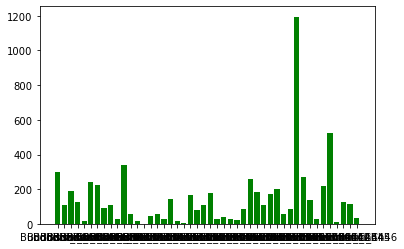

In [33]:
Buddhism_chapters = [key for key in total_words_chapter["Buddhism"].keys()]
Buddhism_chapters_count = [total_words_chapter["Buddhism"][key] for key in total_words_chapter["Buddhism"].keys()]

plt.bar(Buddhism_chapters, Buddhism_chapters_count, color='green')

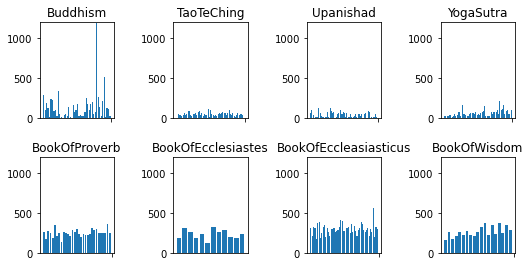

In [70]:
figure, axes = plt.subplots(nrows=2, ncols=4)
plt.title("Words Per Chapter")
index = 1
for book in total_words_chapter.keys():
    chapters = [key for key in total_words_chapter[book].keys()]
    chapters_count = [total_words_chapter[book][key] for key in total_words_chapter[book].keys()]
    
    plt.subplot(2, 4, index) # row 1, col 2 index 1
    plt.bar(chapters, chapters_count)
    plt.ylim(0, 1200)
    plt.title(book)
    plt.xticks(" ")
    index += 1

# plt.show()

# plt.xlabel("Chapters")
# plt.ylabel("Word Count")
# figure.tight_layout(pad = 4.0)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.2, 
                    top=0.9, 
                    wspace=0.8, 
                    hspace=0.4)


# plt.xticks(x_pos, x)

plt.show()

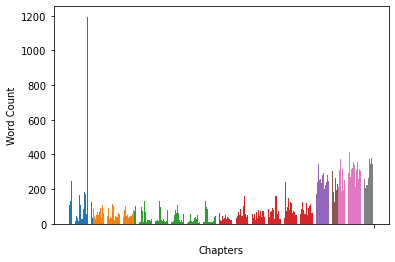

In [72]:
chapters_dict = {}
for book in total_words_chapter.keys():
    chapters = [key for key in total_words_chapter[book].keys()]
    chapters_count = [total_words_chapter[book][key] for key in total_words_chapter[book].keys()]
    #chapters_dict[book] = chapters_count
    plt.bar(chapters, chapters_count)

# fig, ax = plt.subplots()
# ax.bar(chapters_dict.values())
# ax.set_xticklabels(chapters_dict.keys())
# plt.show()

plt.xlabel("Chapters")
plt.ylabel("Word Count")
plt.xticks(" ")
# plt.title("Energy output from various fuel sources")

# plt.xticks(x_pos, x)

plt.show()

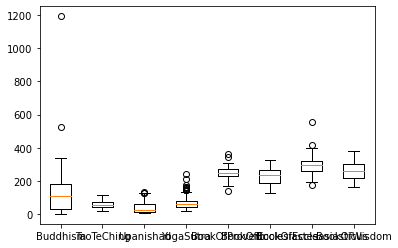

In [30]:
# chapters = []
# for book in total_words_chapter.keys():
#     chapters = [key for key in total_words_chapter[book].keys()]
#     chapters_count = [total_words_chapter[book][key] for key in total_words_chapter[book].keys()]
#     chapters.append(chapters_count)

# plt.boxplot(chapters, vert = False)
# plt.title(book)
# plt.show()


chapters_dict = {}
for book in total_words_chapter.keys():
    chapters = [key for key in total_words_chapter[book].keys()]
    chapters_count = [total_words_chapter[book][key] for key in total_words_chapter[book].keys()]
    chapters_dict[book] = chapters_count

fig, ax = plt.subplots()
ax.boxplot(chapters_dict.values())
ax.set_xticklabels(chapters_dict.keys())
plt.show()

In [76]:
#Creating a deep copy of total_words

total_words_chapter_copy = {key: value[:] for key, value in total_words_chapter.items()}

total_words_chapter_copy["Buddhism"].pop('Buddhism_Ch37')

{'Buddhism': Chapters
Buddhism_Ch1      298
Buddhism_Ch2      107
Buddhism_Ch3      188
Buddhism_Ch4      129
Buddhism_Ch5       15
Buddhism_Ch6      244
Buddhism_Ch7      226
Buddhism_Ch8       89
Buddhism_Ch9      110
Buddhism_Ch10      30
Buddhism_Ch11     339
Buddhism_Ch12      59
Buddhism_Ch13      16
Buddhism_Ch14       0
Buddhism_Ch15      45
Buddhism_Ch16      56
Buddhism_Ch17      31
Buddhism_Ch18     144
Buddhism_Ch19      17
Buddhism_Ch20       8
Buddhism_Ch21     166
Buddhism_Ch22      80
Buddhism_Ch23     108
Buddhism_Ch24     178
Buddhism_Ch25      29
Buddhism_Ch26      42
Buddhism_Ch27      29
Buddhism_Ch28      25
Buddhism_Ch29      86
Buddhism_Ch30     257
Buddhism_Ch31     182
Buddhism_Ch32     109
Buddhism_Ch33     174
Buddhism_Ch34     204
Buddhism_Ch35      57
Buddhism_Ch36      86
Buddhism_Ch37    1194
Buddhism_Ch38     272
Buddhism_Ch39     139
Buddhism_Ch40      30
Buddhism_Ch41     220
Buddhism_Ch42     522
Buddhism_Ch43      13
Buddhism_Ch44     124
Buddhism_C

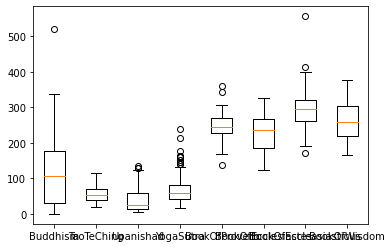

In [78]:
#Graphs after removing the outlier:

chapters_dict = {}
for book in total_words_chapter_copy.keys():
    chapters = [key for key in total_words_chapter_copy[book].keys()]
    chapters_count = [total_words_chapter_copy[book][key] for key in total_words_chapter_copy[book].keys()]
    chapters_dict[book] = chapters_count

fig, ax = plt.subplots()
ax.boxplot(chapters_dict.values())
ax.set_xticklabels(chapters_dict.keys())
plt.show()

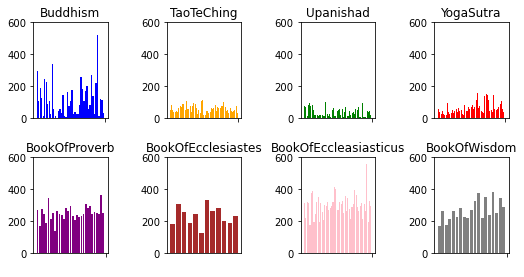

In [107]:
figure, axes = plt.subplots(nrows=2, ncols=4)
plt.title("Words Per Chapter")
colors = ['','blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']
index = 1
for book in total_words_chapter_copy.keys():
    chapters = [key for key in total_words_chapter_copy[book].keys()]
    chapters_count = [total_words_chapter_copy[book][key] for key in total_words_chapter_copy[book].keys()]
    
    plt.subplot(2, 4, index) # row 1, col 2 index 1
    plt.bar(chapters, chapters_count, color = colors[index])
    plt.ylim(0, 600)
    plt.title(book)
    plt.xticks(" ")
    index += 1

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.2, 
                    top=0.9, 
                    wspace=0.8, 
                    hspace=0.4)

plt.show()

TypeError: 'list' object is not callable

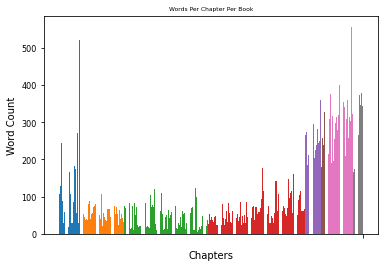

In [281]:
for book in total_words_chapter_copy.keys():
    chapters = [key for key in total_words_chapter_copy[book].keys()]
    chapters_count = [total_words_chapter_copy[book][key] for key in total_words_chapter_copy[book].keys()]
    plt.bar(chapters, chapters_count)

plt.xlabel("Chapters")
plt.ylabel("Word Count")
plt.xticks(" ")
plt.title("Words Per Chapter Per Book")

colors = {'Buddhism':'blue', 'TaoTeChing':'orange', 'Upanishad':'green', 'YogaSutra':'red', 'BookOfProverb':'purple', 'BookOfEcclesiastes':'brown', 'BookOfEcclesiasticus':'pink', 'BookOfWisdom':'gray'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, fontsize = 9, ncol = 2)

plt.show()

In [282]:
# Count of Top 20 Words vs Total Words
for i in range(len(top_20_books)):
    print(list(top_20_books[0][:20].values()))

TypeError: 'numpy.ndarray' object is not callable

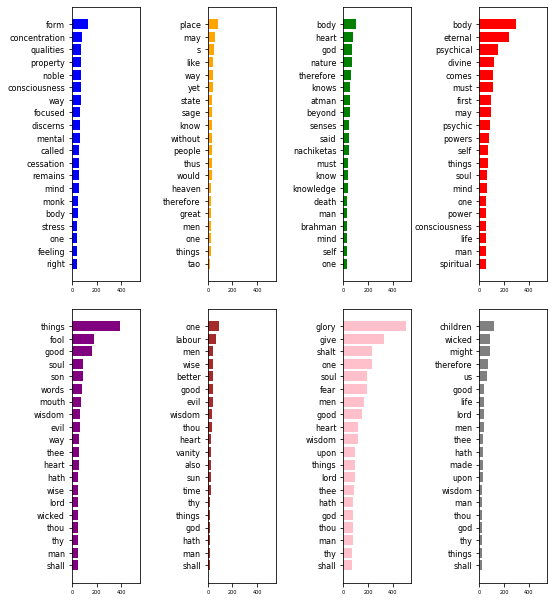

In [193]:
#plot histogram of first 20

colors = ['','blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']
index = 1
for i in range(len(top_20_books)):
    counts = [top_20_books[i][j] for j in range(0,20)]
    counts_reverse = counts[::-1]
    top_20 = list(top_20_books[i][:20].keys())
    
    plt.subplot(2, 4, index) # row 2, col 4, index
    plt.barh(top_20, counts_reverse, color = colors[index])
    plt.xlim(0, 550)
    index += 1
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.2, 
                    top=2.1, 
                    wspace=1.0, 
                    hspace=0.1)

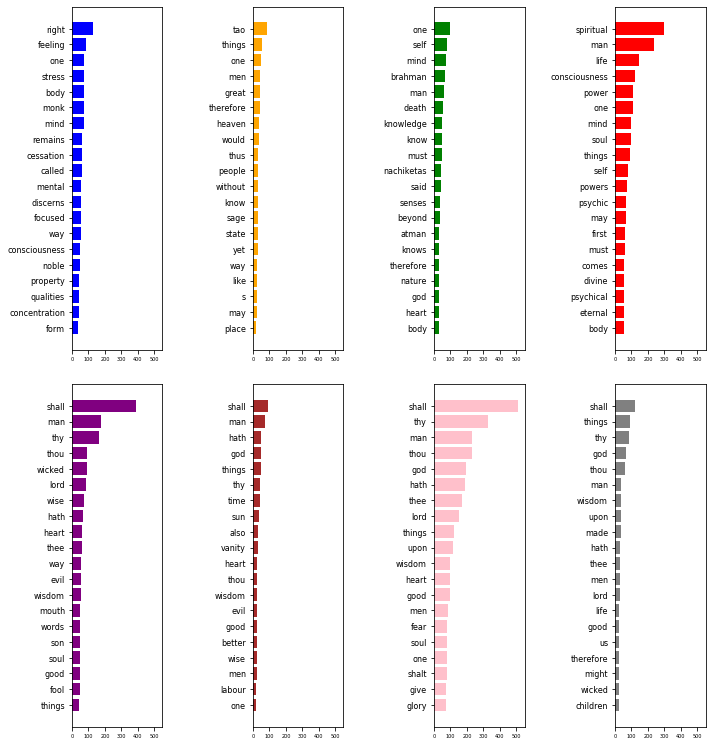

In [257]:
#plot histogram of first 20 but trying something new

#first row of the graph
fig, axs = plt.subplots(2,4, figsize=(8,5))
colors = ['','blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']
index = 1
for i in range(len(top_20_books)//2):
    counts = [top_20_books[i][j] for j in range(0,20)]
    counts_reverse = counts[::-1]
    top_20 = list(top_20_books[i][:20].keys())
    top_20_reversed = top_20[::-1]
    
    #plt.subplots(2, 4, index) # row 2, col 4, index
    axs[0,i].barh(top_20_reversed, counts_reverse, color = colors[index])
    axs[0,i].set_xlim([0, 550])
    index += 1

#second row of the graph   
for i in range(len(top_20_books)//2, len(top_20_books)):
    counts = [top_20_books[i][j] for j in range(0,20)]
    counts_reverse = counts[::-1]
    top_20 = list(top_20_books[i][:20].keys())
    top_20_reversed = top_20[::-1]
    
    #plt.subplots(2, 4, index) # row 2, col 4, index
    axs[1,i-4].barh(top_20_reversed, counts_reverse, color = colors[index])
    axs[1,i-4].set_xlim([0, 550])
    index += 1
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.2, 
                    top=2.1, 
                    wspace=1.0, 
                    hspace=0.1)

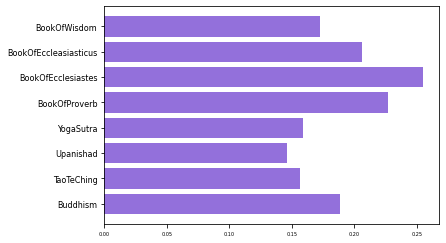

In [283]:
# Count of Top 20 Words vs Total Words
twenty_totals = []
for i in range(len(top_20_books)):
    top_20_total = sum([top_20_books[i][:20][j] for j in range(len(top_20_books[0][:20]))])
    twenty_totals.append(top_20_total)

all_totals = []
for book in total_words_book:
    all_totals.append(total_words_book[book])

proportions = []
for i in range(len(twenty_totals)):
    proportions.append(twenty_totals[i] / all_totals[i])
    
    plt.barh(books[i], proportions[i], color = "mediumpurple")
plt.show()

In [275]:
lst = wisdom_20[:20].keys()
for i in lst:
    print(i)

shall
things
thy
god
thou
man
wisdom
upon
made
hath
thee
men
lord
life
good
us
therefore
might
wicked
children


In [300]:
print(books)
print(top_20_books[4])
print(top_20_books[5])
print(top_20_books[7])

['Buddhism', 'TaoTeChing', 'Upanishad', 'YogaSutra', 'BookOfProverb', 'BookOfEcclesiastes', 'BookOfEccleasiasticus', 'BookOfWisdom']
shall          389
man            176
thy            165
thou            93
wicked          92
              ... 
circuits         0
foreseen         0
reasoning        0
destroyedst      0
successors       0
Length: 8266, dtype: int64
shall          89
man            71
hath           46
god            46
things         46
               ..
touch           0
hinder          0
astray          0
idealistic      0
foolishness     0
Length: 8266, dtype: int64
shall          120
things          89
thy             86
god             67
thou            61
              ... 
wherever         0
disquiet         0
distributed      0
diligent         0
foolishness      0
Length: 8266, dtype: int64


# 3. Naive Bayes Algorithm

In [8]:
total_three_books = total_words_book["BookOfProverb"] + total_words_book['BookOfEcclesiastes'] + total_words_book['BookOfWisdom']

proverb_index = 4
eccle_index = 5
wisdom_index = 7

total_proverb = sum([top_20_books[proverb_index][j] for j in range(len(top_20_books[0]))]) + 1
total_eccle = sum([top_20_books[eccle_index][j] for j in range(len(top_20_books[0]))]) + 1
total_wisdom = sum([top_20_books[wisdom_index][j] for j in range(len(top_20_books[0]))]) + 1

prob_proverb = total_proverb / total_three_books + 1
prob_eccle = total_eccle / total_three_books + 1
prob_wisdom = total_wisdom / total_three_books + 1

top_books = [j for j in [i.iloc[:,1:].sum() for i in book_list]]

In [9]:
# RUN ONCE #
proverb_feature_list = [((top_books[proverb_index][i] + 1) / total_proverb) for i in range(len(top_books[proverb_index]))]
eccle_feature_list = [((top_books[eccle_index][i] + 1) / total_eccle) for i in range(len(top_books[proverb_index]))]
wisdom_feature_list = [(top_books[wisdom_index][i] + 1) / total_wisdom for i in range(len(top_books[proverb_index]))]

In [23]:
# INPUT CHAPTER DATA FOR CLASSIFICATION #
input_chapter = data_train.iloc[478]
print(input_chapter)

Chapters       BookOfProverb_Ch1
foolishness                    0
hath                           0
wholesome                      0
takest                         0
                     ...        
visual                         0
thoughts                       0
illumines                      0
attire                         0
explains                       0
Name: 478, Length: 8267, dtype: object


In [11]:
# PREDICTION #
def book_classifier_prediction(input_chapter):
    #Probability of Proverb Given Features
    proverb_prob_product = prob_proverb
    for feature in range(len(top_books[proverb_index])):
        if input_chapter[feature] > 1:
            #print(input_chapter[feature])
            prob_feature_given_proverb = (proverb_feature_list[feature] * (input_chapter[feature] + 1))
            #print(prob_feature_given_proverb)
            proverb_prob_product *= prob_feature_given_proverb
            #print(proverb_prob_product)


    #Probability of Ecclesiastes Given Features
    eccle_prob_product = prob_eccle
    for feature in range(len(top_books[eccle_index])):
        if input_chapter[feature] > 1:
            prob_feature_given_eccle = (eccle_feature_list[feature] * (input_chapter[feature] + 1))
            eccle_prob_product *= prob_feature_given_eccle

    #Probability of Wisdom Given Features
    wisdom_prob_product = prob_wisdom
    for feature in range(len(top_books[wisdom_index])):
        if input_chapter[feature] > 1:
            prob_feature_given_wisdom = (wisdom_feature_list[feature] * (input_chapter[feature] + 1))
            wisdom_prob_product *= prob_feature_given_wisdom

    # CLASSIFICATION #
    if max(proverb_prob_product, eccle_prob_product, wisdom_prob_product) == proverb_prob_product:
        return "BookOfProverb"
    elif max(proverb_prob_product, eccle_prob_product, wisdom_prob_product) == eccle_prob_product:
        return "BookOfEcclesiastes"
    else:
        return "BookOfWisdom"

    #return estimated_label

In [28]:
# CALCULATE ERROR #
true_label = ['BookOfProverb'] * 31 + ['BookOfEcclesiastes'] * 12 + ['BookOfWisdom'] * 19
estimated_labels = []

for chapter in range(478, 521):
    estimated_labels.append(book_classifier_prediction(data_test.iloc[chapter]))
    
for chapter in range(571, 590):
    estimated_labels.append(book_classifier_prediction(data_test.iloc[chapter]))
    
print(estimated_labels)

['BookOfProverb', 'BookOfProverb', 'BookOfProverb', 'BookOfProverb', 'BookOfProverb', 'BookOfProverb', 'BookOfProverb', 'BookOfProverb', 'BookOfProverb', 'BookOfProverb', 'BookOfProverb', 'BookOfProverb', 'BookOfProverb', 'BookOfProverb', 'BookOfProverb', 'BookOfProverb', 'BookOfProverb', 'BookOfProverb', 'BookOfProverb', 'BookOfProverb', 'BookOfProverb', 'BookOfProverb', 'BookOfProverb', 'BookOfProverb', 'BookOfProverb', 'BookOfProverb', 'BookOfProverb', 'BookOfProverb', 'BookOfProverb', 'BookOfProverb', 'BookOfProverb', 'BookOfEcclesiastes', 'BookOfEcclesiastes', 'BookOfEcclesiastes', 'BookOfEcclesiastes', 'BookOfEcclesiastes', 'BookOfEcclesiastes', 'BookOfEcclesiastes', 'BookOfEcclesiastes', 'BookOfEcclesiastes', 'BookOfEcclesiastes', 'BookOfEcclesiastes', 'BookOfEcclesiastes', 'BookOfWisdom', 'BookOfWisdom', 'BookOfWisdom', 'BookOfWisdom', 'BookOfWisdom', 'BookOfWisdom', 'BookOfWisdom', 'BookOfWisdom', 'BookOfWisdom', 'BookOfWisdom', 'BookOfWisdom', 'BookOfWisdom', 'BookOfWisdom', 